In [1]:
import os
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp


def download(PATH,local_name,format_offile):
    '''This function takes PATH which is url and local_name i.e the name of file after downloaded and format
    and downloads the file from web and stores in your path'''
    local_path=os.path.join("./",f'{local_name}.{format_offile}')
    urllib.request.urlretrieve(PATH,local_path)

In [2]:
# loading all csv files using pandas
PATH = '../datasets/'
Study_A = pd.read_csv(PATH+"Study_A.csv")
Study_B = pd.read_csv(PATH+"Study_B.csv")
Study_C = pd.read_csv(PATH+"Study_C.csv")
Study_D = pd.read_csv(PATH+"Study_D.csv")
Study_E = pd.read_csv(PATH+"Study_E.csv") 

# Treatment effect

<p>Does the (anonymized) treatment have an effect on schizophrenia? Your goal is to use the data to make a
case for or against the effect of treatment. Note that this objective is intentionally left somewhat ambiguous, as to give you flexibility on how to evaluate the treatment effect.</p>

In [3]:
Study_A_grouped = []
same_id = Study_A.iloc[0,:]["PatientID"] # initialized id
dummy = []

dummy.append(Study_A.iloc[0,:])

for index,row in Study_A.iloc[1:,:].iterrows():
    if(row["PatientID"]!=same_id):
        Study_A_grouped.append(dummy)
        dummy=[]
        dummy.append(row)
        same_id = row["PatientID"]
    else:
        dummy.append(row)

In [4]:
all_studies = pd.concat([Study_A,Study_B,Study_C,Study_D,Study_E])

In [5]:
all_studies_control = all_studies[all_studies["TxGroup"]=="Control"]
all_studies_treatment = all_studies[all_studies["TxGroup"]!="Control"]

Text(0, 0.5, 'PANSS Score for Control group')

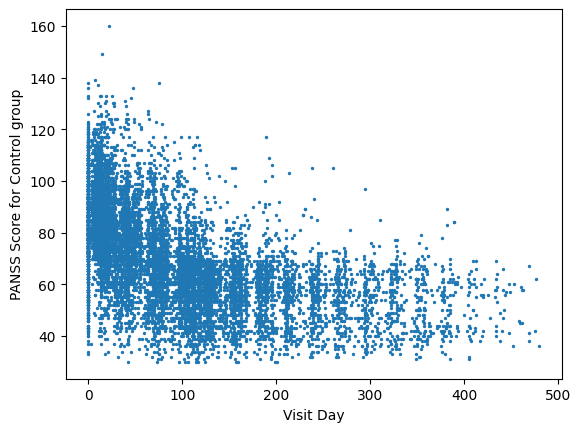

In [6]:
plt.scatter(all_studies_control["VisitDay"],all_studies_control["PANSS_Total"],s=2)
plt.xlabel("Visit Day")
plt.ylabel("PANSS Score for Control group")

Text(0, 0.5, 'PANSS Score for Treatment group')

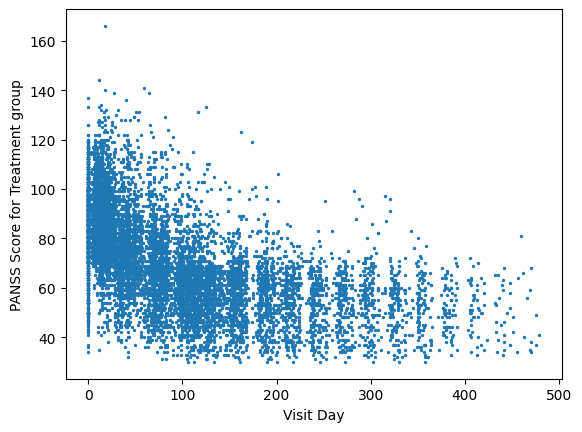

In [7]:
plt.scatter(all_studies_treatment["VisitDay"],all_studies_treatment["PANSS_Total"],s=2)
plt.xlabel("Visit Day")
plt.ylabel("PANSS Score for Treatment group")

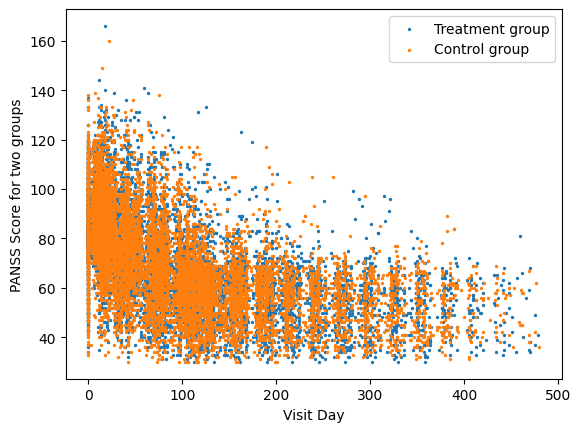

In [8]:
plt.scatter(all_studies_treatment["VisitDay"],all_studies_treatment["PANSS_Total"],s=2,label='Treatment group')
plt.scatter(all_studies_control["VisitDay"],all_studies_control["PANSS_Total"],s=2,label='Control group')
plt.xlabel("Visit Day")
plt.ylabel("PANSS Score for two groups")
plt.legend()